# Regions-of-interest (ROIs)

# Let's first look at the whole-brain tractogram

In [ ]:
#Load mrtrix3
import module
await module.load('mrtrix3/3.0.4')

In [1]:
#niivue

In [2]:
from ipyniivue import NiiVue

In [3]:
nv=NiiVue()
nv.load_meshes(
    [
        {"path": "../data/200k_streamlines_for_displaying.tck"}
    ]
)
nv

In [4]:
!tckinfo ../data/200k_streamlines_for_displaying.tck | grep ' count:'

    count:                200000


# <p style="text-align: justify;"> To identify the whole corticospinal tract, we have <span style="color:green;">__two inclusion ROIs__ (the cortex and the brainstem)</span> and <span style="color:red;">__two exclusion ROIs__ (the cerebellum and corpus callosum)</span>. We will only include streamlines from the whole-brain tractography that <span style="color:green;">___pass throught the brainstem ROI and end within 2mm from the cortical ROI__ (because cortical ROIs are mostly not exactly aligned with the cortex). We will <span style="color:red;">exclude streamlines that go <span style="color:red;">__through the corpus callosum and that enter (or pass through) the cerebellum__ </span> </p>

In [6]:
nv=NiiVue()
nv.load_volumes(
    [
        {"path": "anatomical.nii.gz"}, 
        {"path": "pons_corrected.mif"},
        {"path": "cortex_together.mif"},
        {"path": "cerebellum_maskedWMGM.mif"},
        {"path": "corpus_callosum.mif"}
    ]
)
nv.volumes[1].colormap='green'
nv.volumes[2].colormap='green'
nv.volumes[3].colormap='red'
nv.volumes[4].colormap='red'
nv

NiiVue(height=300)

In [15]:
#Takes a while, so let's not run it today (we have provided you with the correct file anyway)
#!tckedit ../data/200k_streamlines_for_displaying.tck ./selected_streamlines.tck -include pons_corrected.mif -exclude cerebellum_maskedWMGM.mif -exclude corpus_callosum.mif -force

tckedit: [100%] uncompressing image "cerebellum_maskedWMGM.mif.gz"[0K
tckedit: [100%] uncompressing image "corpus_callosum.mif.gz"[0K
tckedit: [done]   200000 read,     5291 written


In [52]:
!tckinfo ./selected_streamlines.tck | grep ' count:'

    count:                5291


In [99]:
nv=NiiVue()
nv.load_meshes(
    [
        {"path": "./selected_streamlines.tck"}
    ]
)
nv

NiiVue(height=300)

### Select the streamlines that end within 2mm of our cortical ROI

In [22]:
!tck2connectome ./selected_streamlines.tck ./fulltract_bilateral_CST.mif ./connectivity_values.csv -out_assignments assignments_fulltract_bilateral_CST.txt -symmetric -zero_diagonal -force
!connectome2tck ./selected_streamlines.tck assignments_fulltract_bilateral_CST.txt ./fulltract_CST -nodes 2 -force

connectome2tck: [WARNING] existing output files will be overwritten
connectome2tck: [done] reading streamline assignments file[0K
connectome2tck: [100%] Extracting tracks from connectome[0K


In [54]:
!tckinfo ./fulltract_CST2-3.tck | grep ' count:'

    count:                2152


In [7]:
nv=NiiVue()
nv.load_meshes(
    [
        {"path": "./fulltract_CST2-3.tck"}
    ]
)
nv

NiiVue(height=300)

## Let's clean it up a bit for visualization purposes by removing the connections that anterior and posterior to the CST are likely to be spurious. We drew these ROIs manually with mrview (part of the mrtrix3 software package).

In [20]:
nv=NiiVue()
nv.load_volumes(
    [
        {"path": "anatomical.nii.gz"}, 
        {"path": "ROI_cleanup_lateral.mif"},
        {"path": "ROI_cleanup_anterior.mif"},
        {"path": "ROI_cleanup_posterior.mif"},
        {"path": "ROI_cleanup_posterior2.mif"}
    ]
)
nv.volumes[1].colormap='red'
nv.volumes[2].colormap='red'
nv.volumes[3].colormap='red'
nv.volumes[4].colormap='red'
nv

NiiVue(height=300)

In [18]:
!tckedit ./fulltract_CST2-3.tck ./fulltract_CST2-3_cleaned.tck -exclude ROI_cleanup_lateral.mif -exclude ROI_cleanup_anterior.mif -exclude ROI_cleanup_posterior.mif -exclude ROI_cleanup_posterior2.mif -force

tckedit: [WARNING] existing output files will be overwritten
tckedit: [done]     2152 read,     2130 written


In [19]:
nv=NiiVue()
nv.load_meshes(
    [
        {"path": "./fulltract_CST2-3_cleaned.tck"}
    ]
)
nv

NiiVue(height=300)

This looks already a lot cleaner

# Now let's try to divide this tract into three parts: a motor, somatosensory, and premotor part

In [28]:
!tck2connectome ./fulltract_CST2-3_cleaned.tck ./three_regions_together_bilateral_CST.mif ./connectivity_values_subdivision.csv -out_assignments assignments_fulltract_bilateral_CST_subdivision.txt -symmetric -zero_diagonal -force
!connectome2tck ./fulltract_CST2-3_cleaned.tck assignments_fulltract_bilateral_CST_subdivision.txt ./fulltract_CST_subdivision -nodes 2,3,4 -force

tck2connectome: [WARNING] existing output files will be overwritten
tck2connectome: Image "./three_regions_together_bilateral_CST.mif" stored with floating-point type; need to check for non-integer or negative values
tck2connectome: [100%] Verifying parcellation image[0K
tck2connectome: [100%] Constructing connectome[0K
tck2connectome: [WARNING] The following nodes do not have any streamlines assigned:
tck2connectome: [WARNING] 1
tck2connectome: [WARNING] (This may indicate a poor registration)
connectome2tck: [WARNING] existing output files will be overwritten
connectome2tck: [done] reading streamline assignments file[0K
connectome2tck: [100%] Extracting tracks from connectome[0K


In [39]:
nv=NiiVue()
nv.load_volumes(
    [
        {"path": "anatomical.nii.gz"}
    ]
)
nv.load_meshes(
    [
        {"path": "./fulltract_CST_subdivision2-5.tck"}
    ]
)
nv

NiiVue(height=300)

The somatosensory part of the CST

In [53]:
nv=NiiVue()
nv.load_volumes(
    [
        {"path": "anatomical.nii.gz"}
    ]
)
nv.load_meshes(
    [
        {"path": "./fulltract_CST_subdivision3-5.tck"}
    ]
)
nv

NiiVue(height=300)

The motor part of the CST

In [54]:
nv=NiiVue()
nv.load_volumes(
    [
        {"path": "anatomical.nii.gz"}
    ]
)
nv.load_meshes(
    [
        {"path": "./fulltract_CST_subdivision4-5.tck"}
    ]
)
nv

NiiVue(height=300)

The premotor part of the CST

(np.float64(-39.302477073669436),
 np.float64(45.06150646209717),
 np.float64(-40.76743583679199),
 np.float64(85.47967796325683))

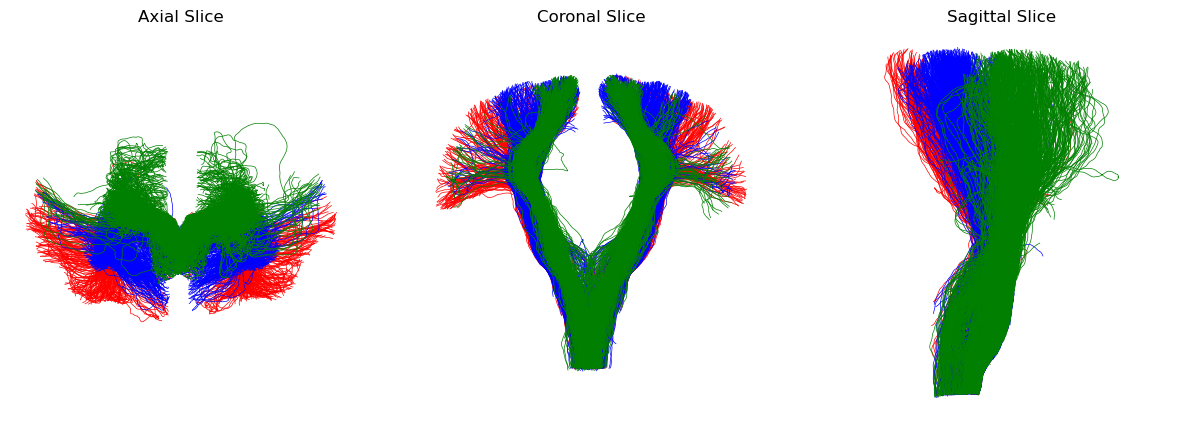

In [51]:
# Somatosensory part
# Load the .tck file using nibabel
tractogram1 = nib.streamlines.load("./fulltract_CST_subdivision2-5.tck")
streamlines_to_display1 = tractogram1.streamlines
streamlines_to_display1 = list(streamlines_to_display1)

tractogram2 = nib.streamlines.load("./fulltract_CST_subdivision3-5.tck")
streamlines_to_display2 = tractogram2.streamlines
streamlines_to_display2 = list(streamlines_to_display2)

tractogram3 = nib.streamlines.load("./fulltract_CST_subdivision4-5.tck")
streamlines_to_display3 = tractogram3.streamlines
streamlines_to_display3 = list(streamlines_to_display3)

# Set up the plot with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Axial slice 
for streamline in streamlines_to_display1:
    axes[0].plot(streamline[:, 0], streamline[:, 1], color='red', lw=0.5)
for streamline in streamlines_to_display2:
    axes[0].plot(streamline[:, 0], streamline[:, 1], color='blue', lw=0.5)
for streamline in streamlines_to_display3:
    axes[0].plot(streamline[:, 0], streamline[:, 1], color='green', lw=0.5)
axes[0].axis("off")
axes[0].set_title("Axial Slice")
axes[0].axis("equal")

# Plot Coronal slice 
for streamline in streamlines_to_display1:
    axes[1].plot(streamline[:, 0], streamline[:, 2], color='red', lw=0.5)
for streamline in streamlines_to_display2:
    axes[1].plot(streamline[:, 0], streamline[:, 2], color='blue', lw=0.5)
for streamline in streamlines_to_display3:
    axes[1].plot(streamline[:, 0], streamline[:, 2], color='green', lw=0.5)
axes[1].axis("off")
axes[1].set_title("Coronal Slice")
axes[1].axis("equal")

# Plot Sagittal slice 
for streamline in streamlines_to_display1:
    axes[2].plot(streamline[:, 1], streamline[:, 2], color='red', lw=0.5)
for streamline in streamlines_to_display2:
    axes[2].plot(streamline[:, 1], streamline[:, 2], color='blue', lw=0.5)
for streamline in streamlines_to_display3:
    axes[2].plot(streamline[:, 1], streamline[:, 2], color='green', lw=0.5)
axes[2].axis("off")
axes[2].set_title("Sagittal Slice")
axes[2].axis("equal")

Here all three tracts are shown, red = somatosensory, blue = motor, green = premotor

In [ ]:
# nibabel:

In [41]:
import matplotlib.pyplot as plt
import nibabel as nib
from fury import colormap


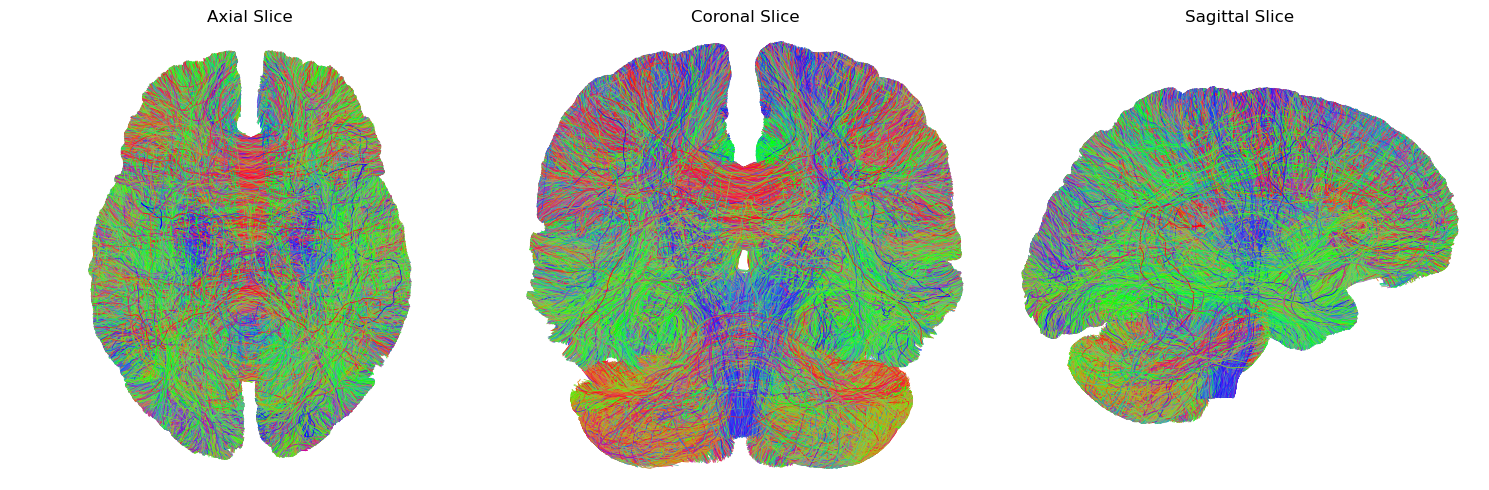

In [14]:
# Load the .tck file using nibabel
tractogram = nib.streamlines.load("./200k_streamlines_for_displaying.tck")
streamlines_to_display = tractogram.streamlines
streamlines_to_display = list(streamlines_to_display)  

# Use Fury's colormap for streamline coloring based on orientation
colors = colormap.line_colors(streamlines_to_display)

# Set up the plot with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Axial slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[0].plot(streamline[:, 0], streamline[:, 1], color=color, lw=0.5)
axes[0].axis("off")
axes[0].set_title("Axial Slice")
axes[0].axis("equal")

# Plot Coronal slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[1].plot(streamline[:, 0], streamline[:, 2], color=color, lw=0.5)
axes[1].axis("off")
axes[1].set_title("Coronal Slice")
axes[1].axis("equal")

# Plot Sagittal slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[2].plot(streamline[:, 1], streamline[:, 2], color=color, lw=0.5)
axes[2].axis("off")
axes[2].set_title("Sagittal Slice")
axes[2].axis("equal")

plt.tight_layout()
plt.show()

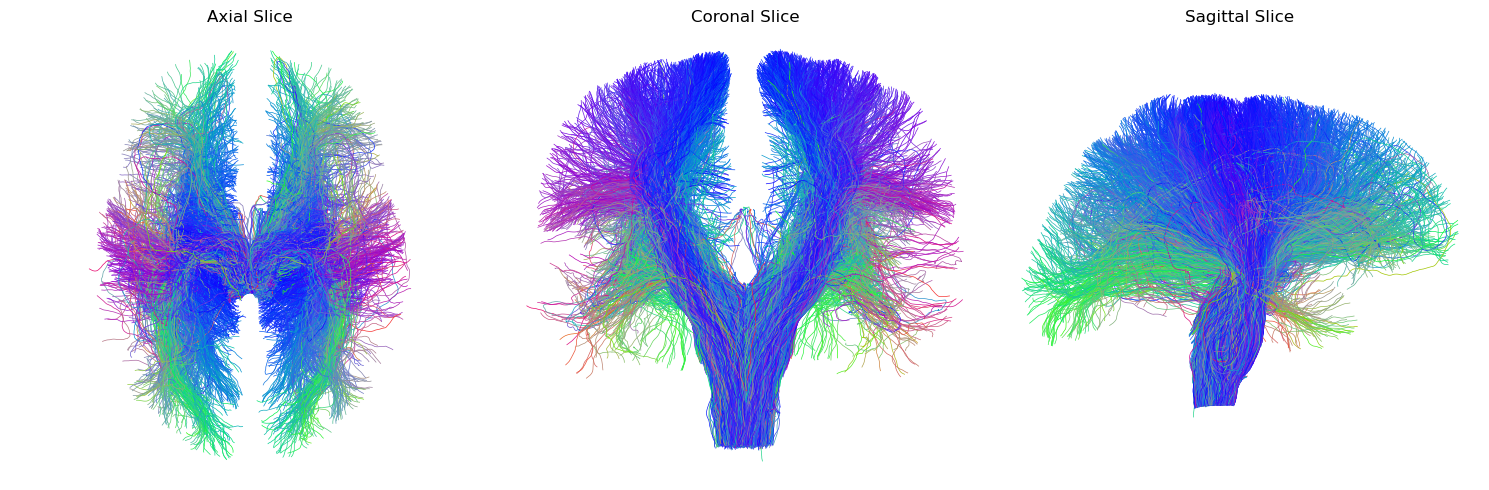

In [17]:
# Load the .tck file using nibabel
tractogram = nib.streamlines.load("./selected_streamlines.tck")
streamlines_to_display = tractogram.streamlines
streamlines_to_display = list(streamlines_to_display)  

# Use Fury's colormap for streamline coloring based on orientation
colors = colormap.line_colors(streamlines_to_display)

# Set up the plot with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Axial slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[0].plot(streamline[:, 0], streamline[:, 1], color=color, lw=0.5)
axes[0].axis("off")
axes[0].set_title("Axial Slice")
axes[0].axis("equal")

# Plot Coronal slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[1].plot(streamline[:, 0], streamline[:, 2], color=color, lw=0.5)
axes[1].axis("off")
axes[1].set_title("Coronal Slice")
axes[1].axis("equal")

# Plot Sagittal slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[2].plot(streamline[:, 1], streamline[:, 2], color=color, lw=0.5)
axes[2].axis("off")
axes[2].set_title("Sagittal Slice")
axes[2].axis("equal")

plt.tight_layout()
plt.show()

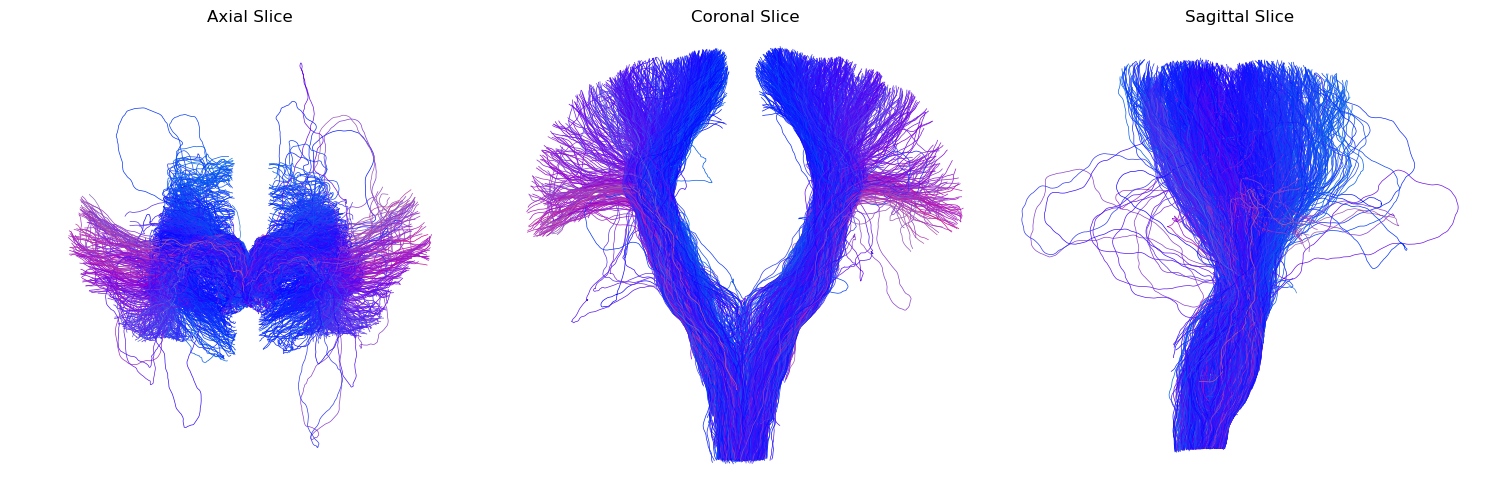

In [29]:
# Load the .tck file using nibabel
tractogram = nib.streamlines.load("./fulltract_CST2-3.tck")
streamlines_to_display = tractogram.streamlines
streamlines_to_display = list(streamlines_to_display)  

# Use Fury's colormap for streamline coloring based on orientation
colors = colormap.line_colors(streamlines_to_display)

# Set up the plot with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Axial slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[0].plot(streamline[:, 0], streamline[:, 1], color=color, lw=0.5)
axes[0].axis("off")
axes[0].set_title("Axial Slice")
axes[0].axis("equal")

# Plot Coronal slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[1].plot(streamline[:, 0], streamline[:, 2], color=color, lw=0.5)
axes[1].axis("off")
axes[1].set_title("Coronal Slice")
axes[1].axis("equal")

# Plot Sagittal slice 
for streamline, color in zip(streamlines_to_display, colors):
    axes[2].plot(streamline[:, 1], streamline[:, 2], color=color, lw=0.5)
axes[2].axis("off")
axes[2].set_title("Sagittal Slice")
axes[2].axis("equal")

plt.tight_layout()
plt.show()

(np.float64(-39.302477073669436),
 np.float64(45.06150646209717),
 np.float64(-40.76743583679199),
 np.float64(85.47967796325683))

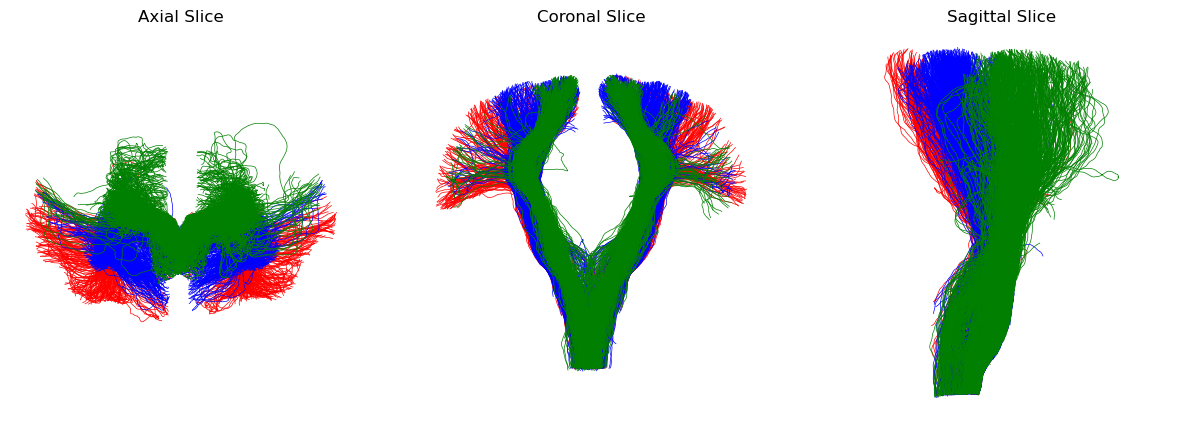